In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))

# import better_exceptions
from scikit_quri.qnn.regressor import QNNRegressor
import numpy as np
from typing import Optional
from quri_parts.circuit.utils.circuit_drawer import draw_circuit
from quri_parts.circuit import UnboundParametricQuantumCircuit,LinearMappedUnboundParametricQuantumCircuit
from numpy.random import default_rng

from qulacs import Observable
from quri_parts.core.operator import Operator, pauli_label
from quri_parts.core.estimator.gradient import (
    create_parameter_shift_gradient_estimator,
    create_numerical_gradient_estimator)
from quri_parts.qulacs.estimator import (
    create_qulacs_vector_estimator,
    create_qulacs_vector_parametric_estimator,
    create_qulacs_vector_concurrent_parametric_estimator,
    create_qulacs_vector_concurrent_estimator,
)
from quri_parts.algo.optimizer import Adam, LBFGS
from scikit_quri.circuit import LearningCircuit
from scikit_quri.circuit.pre_defined import create_farhi_neven_ansatz,create_qcl_ansatz

def generate_noisy_sine(x_min, x_max, num_x):
    rng = default_rng(0)
    x_train = [[rng.uniform(x_min, x_max)] for _ in range(num_x)]
    y_train = [np.sin(np.pi * x[0]) for x in x_train]
    mag_noise = 0.01
    y_train += mag_noise * rng.random(num_x)
    # return np.array(x_train), np.array(y_train)
    return np.array(x_train).flatten(), np.array(y_train)

x_train,y_train = generate_noisy_sine(-1.,1.,80)
x_test,y_test = generate_noisy_sine(-1.,1.,80)

AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.

In [27]:
from scikit_quri.circuit import LearningCircuit
from quri_parts.circuit.utils.circuit_drawer import draw_circuit
import matplotlib.pyplot as plt
n_qubits = 5
depth = 6
n_outputs = 1
# parametric_circuit = create_farhi_neven_ansatz(n_qubits,depth,1)
parametric_circuit = create_qcl_ansatz(n_qubits,depth,0.5,0)

op = Operator()
for i in range(n_outputs):
    op.add_term(pauli_label(f"Z {i}"),1.0)
draw_circuit(parametric_circuit.circuit)
# estimator = create_qulacs_vector_estimator()
estimator = create_qulacs_vector_concurrent_estimator()
# gradient_estimator = create_parameter_shift_gradient_estimator(create_qulacs_vector_concurrent_parametric_estimator())
gradient_estimator = create_numerical_gradient_estimator(create_qulacs_vector_concurrent_parametric_estimator(),delta=1e-10)
adam = Adam()

   ___     ___     ___     ___     ___     ___     ___     ___     ___     ___  
  |PRY|   |PRZ|   |Mat|   |PRX|   |PRZ|   |PRX|   |Mat|   |PRX|   |PRZ|   |PRX| 
--|0  |---|1  |---|10 |---|11 |---|12 |---|13 |---|26 |---|27 |---|28 |---|29 |-
  |___|   |___|   |   |   |___|   |___|   |___|   |   |   |___|   |___|   |___| 
   ___     ___    |   |    ___     ___     ___    |   |    ___     ___     ___  
  |PRY|   |PRZ|   |   |   |PRX|   |PRZ|   |PRX|   |   |   |PRX|   |PRZ|   |PRX| 
--|2  |---|3  |---|   |---|14 |---|15 |---|16 |---|   |---|30 |---|31 |---|32 |-
  |___|   |___|   |   |   |___|   |___|   |___|   |   |   |___|   |___|   |___| 
   ___     ___    |   |    ___     ___     ___    |   |    ___     ___     ___  
  |PRY|   |PRZ|   |   |   |PRX|   |PRZ|   |PRX|   |   |   |PRX|   |PRZ|   |PRX| 
--|4  |---|5  |---|   |---|17 |---|18 |---|19 |---|   |---|33 |---|34 |---|35 |-
  |___|   |___|   |   |   |___|   |___|   |___|   |   |   |___|   |___|   |___| 
   ___     ___    |   |    _

In [28]:
init_params = 2*np.pi*np.random.rand(parametric_circuit.n_learning_params)

In [29]:
qnn = QNNRegressor(n_qubits,parametric_circuit,estimator,gradient_estimator,adam,op)

# qnn.grad_fn(x_train.reshape((-1,1)),y_train.reshape((-1,1)),params=init_params)
qnn.fit(x_train,y_train,maxiter=30)

init_params=array([3.44664544, 1.02557523, 5.14984324, 3.53327415, 1.19879128,
       5.56059774, 0.49210943, 0.02556361, 6.01755108, 2.41510402,
       0.35184313, 2.71798514, 5.43242894, 1.19002201, 4.2680251 ,
       5.50669485, 2.83586063, 3.01952129, 0.23941572, 2.7301955 ,
       2.26449252, 3.0649287 , 4.68999542, 1.72047717, 1.56623506,
       2.84915698, 1.95856676, 5.72645958, 3.21642728, 0.69356487,
       4.29604023, 3.54643485, 3.76752986, 3.81542013, 6.23275621,
       2.94877676, 4.77397995, 0.80541406, 4.44775453, 4.69718371,
       3.46280307, 3.90136375, 3.19461629, 5.423906  , 5.59520803,
       4.99763251, 2.60469108, 4.69491892, 3.19868366, 3.80500971,
       4.45953163, 2.17624099, 6.0126373 , 1.06757689, 0.68065961,
       4.81576389, 2.60901999, 5.129407  , 3.43387789, 4.52969918,
       0.04693288, 0.80830801, 5.35049897, 1.73472421, 3.2954228 ,
       4.01688013, 2.8034693 , 4.83418341, 6.07210886, 3.01113044,
       1.74130278, 4.66074002, 1.50819171, 6.26234

cost=0.010139025912942875


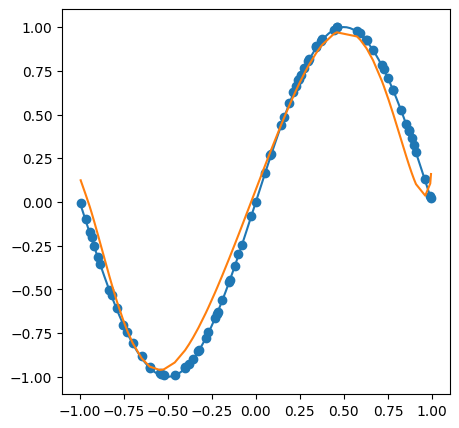

In [30]:
y_pred = qnn.predict(x_test)
y_test = y_test.reshape(-1,1)
plt.figure(figsize=(5,5))

# plt.plot(x_test,y_test,marker="o",color="orange",label="Test")
plt.scatter(
    np.sort(x_test),
    y_test[np.argsort(x_test.flatten())],label="Test")

x_true = np.linspace(-1,1,100)
y_true = np.sin(np.pi * x_true)
plt.plot(x_true,y_true,label="True")
plt.plot(
    np.sort(x_test.flatten()),
    y_pred[np.argsort(x_test.flatten())],
    label="Prediction")
# plt.legend()
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test,y_pred)
print(f"{cost=}")
plt.show()